In [1]:
#Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Extra settings
pd.set_option('display.max_columns',None) # Will not truncate the display of columns 
pd.set_option('display.max_rows',None) 
# np.set_printoptions(linewidth=10) 

In [2]:
#Loading train and test data
try:
    train_df=pd.read_csv('/home/anuragverma/Desktop/Kaggle/Kaggle--House-Prediction/Dataset/train.csv')
    test_df=pd.read_csv('/home/anuragverma/Desktop/Kaggle/Kaggle--House-Prediction/Dataset/test.csv')
    print("Train df shape: " ,train_df.shape)
    print("Test df shape: ", test_df.shape)

except FileNotFoundError:
    print("File not found")

Train df shape:  (1460, 81)
Test df shape:  (1459, 80)


In [3]:
#Getting summary of all columns
train_df_description=train_df.describe(include='all')
print(train_df_description)

                 Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utili

In [4]:
categorical_cols = [col for col in train_df.columns if train_df[col].dtype == 'object'] #selecing only categorical columns

numeric_cols_df=train_df.select_dtypes(include=['number']) # selecting only numeric columns for correlation matrix and creating and df.
print(len(categorical_cols))
print(numeric_cols_df.shape)

print(len(categorical_cols)+numeric_cols_df.shape[1]==train_df.shape[1]) #checking if no. categorical cols+ cols in numeric_cols_df matches the original train df

43
(1460, 38)
True


Text(0.5, 1.0, 'Correlation Heatmap')

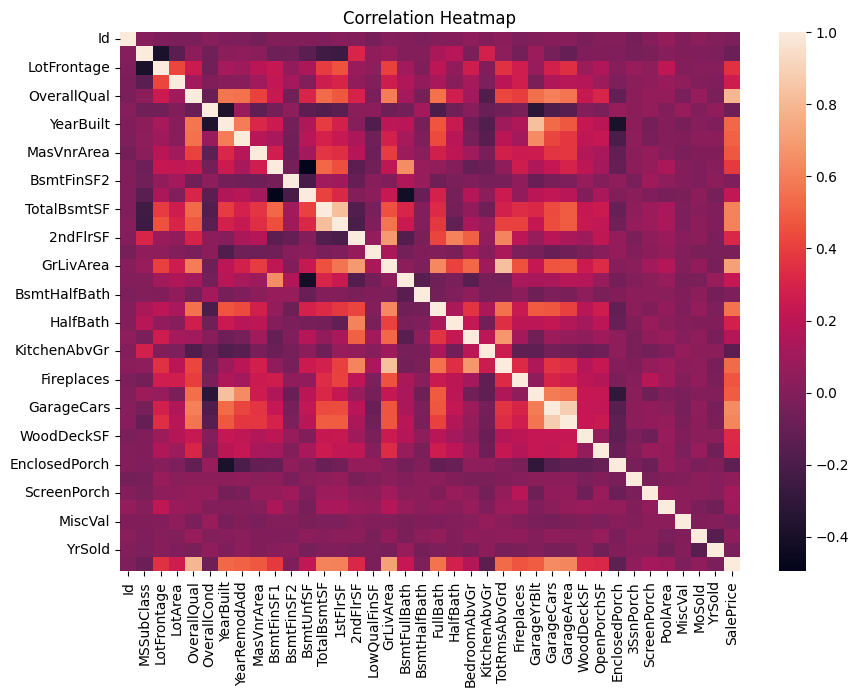

In [5]:
#Creating correlation matrix
correlation_matrix=numeric_cols_df.corr()

#Creating heatmap from the matrix
plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix,fmt='.2f',annot_kws={"size":6})
plt.title('Correlation Heatmap')

In [6]:
# Find the top 20 absolute correlations (excluding self-correlations)
top_correlations = correlation_matrix.unstack().abs().sort_values(ascending=False)
top_correlations = top_correlations[top_correlations != 1].head(20)
print(top_correlations)

GarageArea    GarageCars      0.882475
GarageCars    GarageArea      0.882475
GarageYrBlt   YearBuilt       0.825667
YearBuilt     GarageYrBlt     0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotRmsAbvGrd  GrLivArea       0.825489
TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
OverallQual   SalePrice       0.790982
SalePrice     OverallQual     0.790982
              GrLivArea       0.708624
GrLivArea     SalePrice       0.708624
2ndFlrSF      GrLivArea       0.687501
GrLivArea     2ndFlrSF        0.687501
TotRmsAbvGrd  BedroomAbvGr    0.676620
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFullBath  BsmtFinSF1      0.649212
BsmtFinSF1    BsmtFullBath    0.649212
YearRemodAdd  GarageYrBlt     0.642277
GarageYrBlt   YearRemodAdd    0.642277
dtype: float64
